In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Actual number of DDAs
actuals = [
    23215, 25555, 28021, 32119, 33101, 37401,
    42001, 45789, 50211, 54911, 62022, 67344
]

# Create a time-series DataFrame
months = pd.date_range(start="2019-01", periods=12, freq="M")
data = pd.DataFrame({"Date": months, "Actuals": actuals}).set_index("Date")









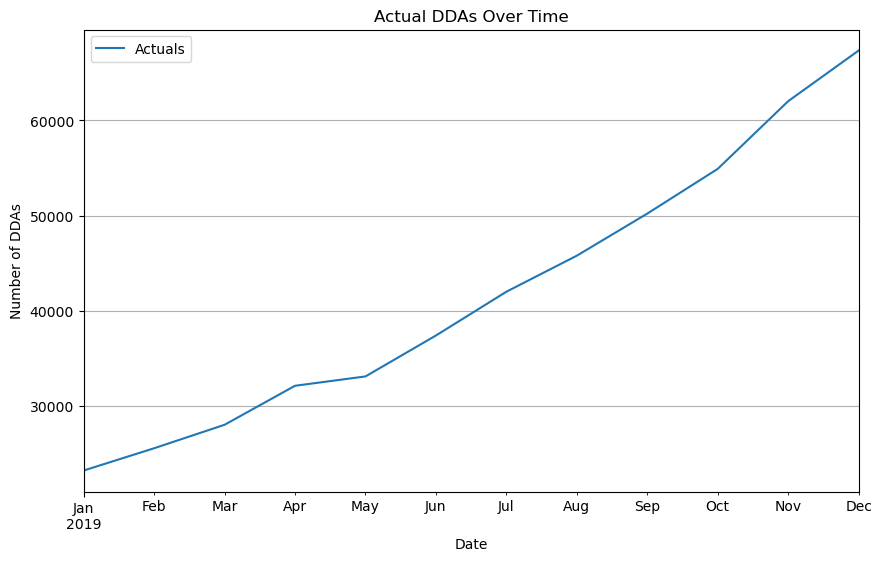

In [7]:
# Plot the data
data.plot(title="Actual DDAs Over Time", legend=True, figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Number of DDAs")
plt.grid()
plt.show()

In [8]:

# Check stationarity with ADF test
adf_test = adfuller(data["Actuals"])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

ADF Statistic: 3.3771657374793076
p-value: 1.0


In [9]:
# If not stationary, apply differencing
if adf_test[1] > 0.05:
    data_diff = data["Actuals"].diff().dropna()
else:
    data_diff = data["Actuals"]

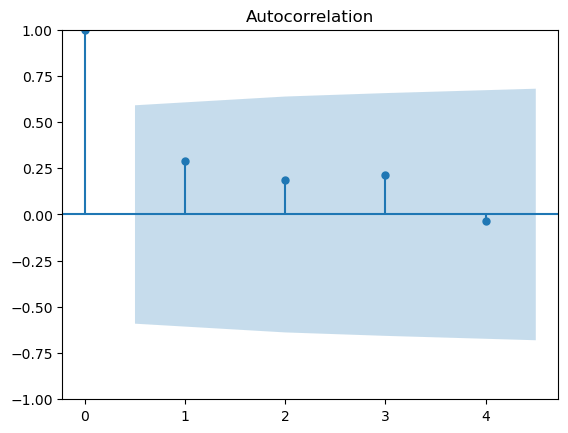

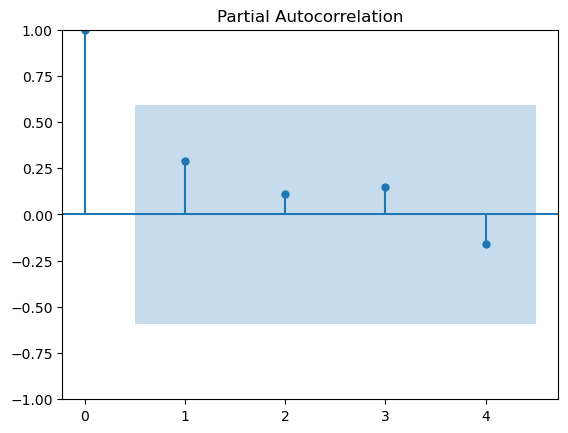

In [16]:
# Plot ACF and PACF
plot_acf(data_diff, lags=4)
plot_pacf(data_diff, lags=4)
plt.show()

In [24]:
# Fit the ARIMA model (using sample p=1, d=1, q=1 as a start)
model = ARIMA(data["Actuals"], order=(4, 1, 4))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Actuals   No. Observations:                   12
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 -95.504
Date:                Sun, 22 Dec 2024   AIC                            209.007
Time:                        15:59:12   BIC                            212.588
Sample:                    01-31-2019   HQIC                           206.750
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0007      1.003      0.001      0.999      -1.966       1.967
ar.L2          0.0562      0.442      0.127      0.899      -0.810       0.923
ar.L3          0.2694      0.964      0.280      0.7

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: Convergence

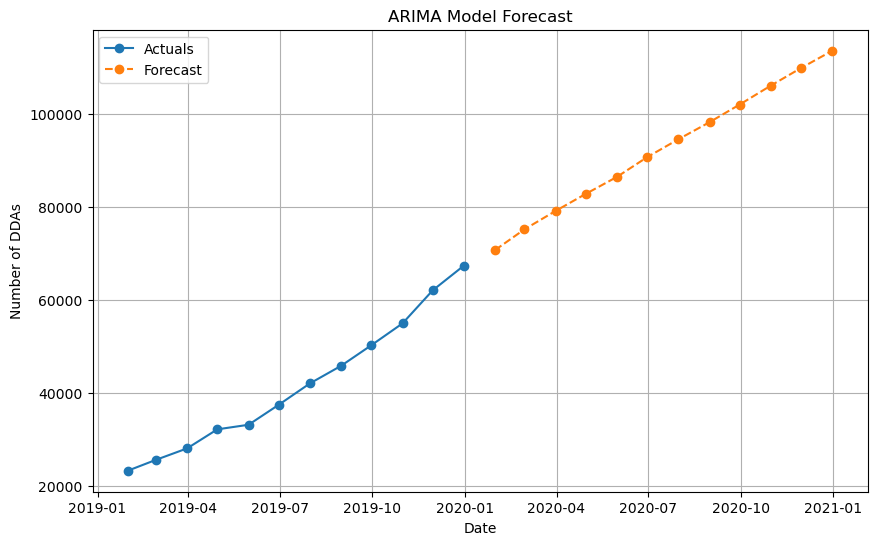

In [25]:


# Forecast for the next 12 months
forecast = model_fit.forecast(steps=12)
forecast_dates = pd.date_range(start="2020-01", periods=12, freq="M")
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plot actuals vs forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Actuals"], label="Actuals", marker="o")
plt.plot(forecast_series.index, forecast_series, label="Forecast", marker="o", linestyle="--")
plt.title("ARIMA Model Forecast")
plt.xlabel("Date")
plt.ylabel("Number of DDAs")
plt.legend()
plt.grid()
plt.show()